<a href="https://colab.research.google.com/github/FranklinPablo/Actividad-1/blob/main/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 4**
# **Pablo Jesús Pérez Franklin A01275868**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
files.upload()

In [ ]:
data_1=pd.read_excel("microretailer_mit_lift_lab_actualizado.xlsx")
data_1

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,71326e5f-441e-4be7-bc68-b828973b8e3b,"November 17, 2022",2022-11-18 20:48:40 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2013790035 19.0439654034),19.043965,-98.201379,Mini súper 7 hermanos,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,no,NaN,NaN,NaN,NaN
1,a38b7c68-0afa-4419-a580-7086538b2e21,"November 17, 2022",2022-11-18 20:48:39 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2016961782 19.0439749111),19.043975,-98.201696,Super papas Lulu,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c11ef540-e06c-4722-a071-09a127ebc23c,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.1964474585 19.0432999683),19.043300,-98.196447,Arte Paquistán,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c7434cb2-dde0-4901-80d7-3d60506ebd27,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.197072078 19.0405699102),19.040570,-98.197072,El vestir,1 Photo,Grocery store (aka. nanostore),...,En desacuerdo,NaN,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,no,NaN,NaN,NaN,NaN
4,3c2177cc-677b-4106-8ed2-6e50f7671a0e,"November 17, 2022",2022-11-18 13:30:19 UTC,Fernando Báez,SRID=4326;POINT(-98.201134218 19.0436743967),19.043674,-98.201134,Antojitos Tony,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,efe2e285-c67e-4a07-8331-218bc4a7203d,"November 3, 2022",2022-11-03 17:05:23 UTC,Francisco Adán,SRID=4326;POINT(-98.194174 19.0431876),19.043188,-98.194174,Xuti Galería,1 Photo,productos tradicionales,...,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,2.212380e+09,Hachi401096@gmail.com
326,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **LIMPIAR DATOS**

In [ ]:
filtro1=data_1.iloc[ : ,[5,6,13,14,16,21,22,29,31,33,43,49,51,56,57,58,59,60,78,90]]
filtro1


,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,273_platform_extra_charge,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,19.043965,-98.201379,1,3.0,3,2.0,10.0,3.0,5.0,2.0,NaN,NaN,NaN,20.0,NaN,NaN,10.0,NaN,2.0,10.0
1,19.043975,-98.201696,2,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.043300,-98.196447,2,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.040570,-98.197072,1,0.0,0,0.0,0.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,19.043674,-98.201134,3,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,19.043188,-98.194174,0,1.0,7,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,0.0
326,19.043115,-98.194066,1,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,19.042809,-98.193439,3,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,19.042558,-98.193818,0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
valores_nulos=filtro1.isnull().sum()
valores_nulos

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        0
268_number_fridges                                     9
104_how_many_shelves_does_the_micro_retailer_have      0
2_current_permanent_employees                        112
4_number_permanent_employees_last_year               129
103_number_own_fridges                               252
145_number_direct_competitors                        124
24_burnout                                           253
273_platform_extra_charge                            322
276_expected_days_informal_credit                    290
36_credit_default_rate                               304
315_frequency_topups                                 306
316_frequency_utility_bills                          325
317_home_deliveries                                  296
62_frequency_only_services                           279
78_number_home_deliveries_week 

In [ ]:
data1=filtro1.copy()
data1=data1.fillna(round(filtro1.mean(),1))
data1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,273_platform_extra_charge,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,19.043965,-98.201379,1,3.0,3,2.0,10.0,3.0,5.0,2.0,NaN,11.8,1.5,20.0,12.2,11.1,10.0,2.0,2.0,10.0
1,19.043975,-98.201696,2,0.0,0,2.1,2.5,2.2,4.1,3.9,NaN,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
2,19.043300,-98.196447,2,0.0,0,2.1,2.5,2.2,4.1,3.9,NaN,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
3,19.040570,-98.197072,1,0.0,0,0.0,0.0,2.2,10.0,3.9,NaN,11.8,1.5,11.8,12.2,11.1,9.4,2.0,1.0,0.0
4,19.043674,-98.201134,3,2.0,3,2.1,2.5,2.2,4.1,3.9,NaN,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,19.043188,-98.194174,0,1.0,7,4.0,2.5,2.2,5.0,3.9,NaN,11.8,1.5,11.8,12.2,11.1,1.0,1.0,5.0,0.0
326,19.043115,-98.194066,1,0.0,5,2.1,2.5,2.2,4.1,3.9,NaN,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
327,19.042809,-98.193439,3,1.0,1,2.1,2.5,2.2,4.1,3.9,NaN,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
328,19.042558,-98.193818,0,1.0,1,2.1,2.5,2.2,4.1,3.9,NaN,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7


In [ ]:
valores_nulos=data1.isnull().sum()
valores_nulos

_latitude                                              0
_longitude                                             0
97_number_of_customers_in_store                        0
268_number_fridges                                     0
104_how_many_shelves_does_the_micro_retailer_have      0
2_current_permanent_employees                          0
4_number_permanent_employees_last_year                 0
103_number_own_fridges                                 0
145_number_direct_competitors                          0
24_burnout                                             0
273_platform_extra_charge                            322
276_expected_days_informal_credit                      0
36_credit_default_rate                                 0
315_frequency_topups                                   0
316_frequency_utility_bills                            0
317_home_deliveries                                    0
62_frequency_only_services                             0
78_number_home_deliveries_week 

In [ ]:
filtro0=data1.loc[:,["273_platform_extra_charge"]]
filtro0

,273_platform_extra_charge
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
325,NaN
326,NaN
327,NaN
328,NaN


In [ ]:
data2=data1.drop(['273_platform_extra_charge'], axis=1)
data2

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,19.043965,-98.201379,1,3.0,3,2.0,10.0,3.0,5.0,2.0,11.8,1.5,20.0,12.2,11.1,10.0,2.0,2.0,10.0
1,19.043975,-98.201696,2,0.0,0,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
2,19.043300,-98.196447,2,0.0,0,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
3,19.040570,-98.197072,1,0.0,0,0.0,0.0,2.2,10.0,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,1.0,0.0
4,19.043674,-98.201134,3,2.0,3,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,19.043188,-98.194174,0,1.0,7,4.0,2.5,2.2,5.0,3.9,11.8,1.5,11.8,12.2,11.1,1.0,1.0,5.0,0.0
326,19.043115,-98.194066,1,0.0,5,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
327,19.042809,-98.193439,3,1.0,1,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
328,19.042558,-98.193818,0,1.0,1,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7


In [ ]:
valores_nulos=data2.isnull().sum()
valores_nulos

_latitude                                            0
_longitude                                           0
97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
103_number_own_fridges                               0
145_number_direct_competitors                        0
24_burnout                                           0
276_expected_days_informal_credit                    0
36_credit_default_rate                               0
315_frequency_topups                                 0
316_frequency_utility_bills                          0
317_home_deliveries                                  0
62_frequency_only_services                           0
78_number_home_deliveries_week                       0
172_supplier_frequency                               0
163_number

In [ ]:
valores_nulos=data2.isnull().sum().sum()
valores_nulos

0

<Figure size 360x504 with 0 Axes>

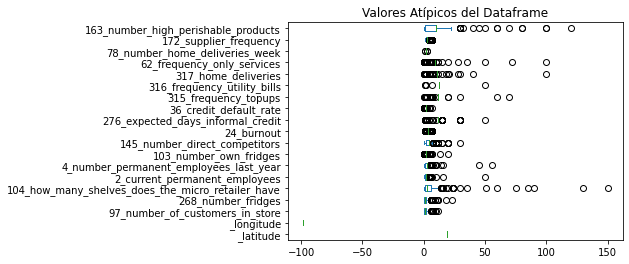

In [ ]:
fig=plt.figure(figsize=(5,7))
data2.plot(kind='box',vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [ ]:
y=data2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75-percentile25

limite_superior_iqr= percentile75 + 1.5*iqr
limite_inferior_iqr= percentile25 - 1.5*iqr
print("límite superior permitido",limite_superior_iqr)
print("límite inferior permitido",limite_inferior_iqr)



límite superior permitido _latitude                                            19.114494
_longitude                                          -98.103732
97_number_of_customers_in_store                       5.000000
268_number_fridges                                    5.000000
104_how_many_shelves_does_the_micro_retailer_have    13.500000
2_current_permanent_employees                         3.750000
4_number_permanent_employees_last_year                4.750000
103_number_own_fridges                                2.200000
145_number_direct_competitors                         7.250000
24_burnout                                            3.900000
276_expected_days_informal_credit                    11.800000
36_credit_default_rate                                1.500000
315_frequency_topups                                 11.800000
316_frequency_utility_bills                          12.200000
317_home_deliveries                                  11.100000
62_frequency_only_services   

In [ ]:
outliers_iqr= data2[(y>limite_superior_iqr)|(y<limite_inferior_iqr)]
outliers_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,3.0,NaN,2.0,NaN,NaN,20.0,NaN,NaN,10.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,NaN
326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
insiders_iqr= data2[(y<=limite_superior_iqr)&(y>=limite_inferior_iqr)]
insiders_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,19.043965,-98.201379,1.0,3.0,3.0,2.0,NaN,NaN,5.0,NaN,11.8,1.5,NaN,12.2,11.1,NaN,2.0,2.0,10.0
1,19.043975,-98.201696,2.0,0.0,0.0,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
2,19.043300,-98.196447,2.0,0.0,0.0,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
3,19.040570,-98.197072,1.0,0.0,0.0,0.0,0.0,2.2,NaN,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,1.0,0.0
4,19.043674,-98.201134,3.0,2.0,3.0,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,19.043188,-98.194174,0.0,1.0,7.0,NaN,2.5,2.2,5.0,3.9,11.8,1.5,11.8,12.2,11.1,NaN,NaN,NaN,0.0
326,19.043115,-98.194066,1.0,0.0,5.0,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
327,19.042809,-98.193439,3.0,1.0,1.0,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
328,19.042558,-98.193818,0.0,1.0,1.0,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7


In [ ]:
valores_nulos_c=insiders_iqr.isnull().sum()
valores_nulos_c

_latitude                                             0
_longitude                                            0
97_number_of_customers_in_store                      12
268_number_fridges                                   16
104_how_many_shelves_does_the_micro_retailer_have    22
2_current_permanent_employees                        30
4_number_permanent_employees_last_year               20
103_number_own_fridges                               78
145_number_direct_competitors                        27
24_burnout                                           77
276_expected_days_informal_credit                    40
36_credit_default_rate                               26
315_frequency_topups                                 24
316_frequency_utility_bills                           5
317_home_deliveries                                  34
62_frequency_only_services                           51
78_number_home_deliveries_week                        4
172_supplier_frequency                          

In [ ]:
data_clean_m=insiders_iqr.copy()
data_clean_m=data_clean_m.fillna(round(insiders_iqr.median(),1))
data_clean_m

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,19.043965,-98.201379,1.0,3.0,3.0,2.0,2.5,2.2,5.0,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.0,10.0
1,19.043975,-98.201696,2.0,0.0,0.0,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
2,19.043300,-98.196447,2.0,0.0,0.0,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
3,19.040570,-98.197072,1.0,0.0,0.0,0.0,0.0,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,1.0,0.0
4,19.043674,-98.201134,3.0,2.0,3.0,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,19.043188,-98.194174,0.0,1.0,7.0,2.0,2.5,2.2,5.0,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,0.0
326,19.043115,-98.194066,1.0,0.0,5.0,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
327,19.042809,-98.193439,3.0,1.0,1.0,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7
328,19.042558,-98.193818,0.0,1.0,1.0,2.1,2.5,2.2,4.1,3.9,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7,9.7


In [ ]:
valores_nulos_m=data_clean_m.isnull().sum()
valores_nulos_m

_latitude                                            0
_longitude                                           0
97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
103_number_own_fridges                               0
145_number_direct_competitors                        0
24_burnout                                           0
276_expected_days_informal_credit                    0
36_credit_default_rate                               0
315_frequency_topups                                 0
316_frequency_utility_bills                          0
317_home_deliveries                                  0
62_frequency_only_services                           0
78_number_home_deliveries_week                       0
172_supplier_frequency                               0
163_number

In [ ]:
filtro2=data_1.iloc[ : ,[0,1,2,3,4,9,10,11,12,17,18,19,20,23,24,25,26,27,28,30,32,34,35,36,37,38,39,40,41,47,48,50,52,53,54,55,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,79,80,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96]]
filtro2

,_record_id,_title,_server_updated_at,_updated_by,_geometry,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,pictures_of_shelves_if_possible,...,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization
0,71326e5f-441e-4be7-bc68-b828973b8e3b,"November 17, 2022",2022-11-18 20:48:40 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2013790035 19.0439654034),Grocery store (aka. nanostore),no,yes,yes,NaN,...,Diariamente,Margen de utilidad,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,De acuerdo,De acuerdo
1,a38b7c68-0afa-4419-a580-7086538b2e21,"November 17, 2022",2022-11-18 20:48:39 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2016961782 19.0439749111),Grocery store (aka. nanostore),no,yes,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c11ef540-e06c-4722-a071-09a127ebc23c,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.1964474585 19.0432999683),Grocery store (aka. nanostore),no,yes,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c7434cb2-dde0-4901-80d7-3d60506ebd27,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.197072078 19.0405699102),Grocery store (aka. nanostore),no,yes,no,NaN,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
4,3c2177cc-677b-4106-8ed2-6e50f7671a0e,"November 17, 2022",2022-11-18 13:30:19 UTC,Fernando Báez,SRID=4326;POINT(-98.201134218 19.0436743967),Micro-restaurant (aka. fondita),no,no,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,efe2e285-c67e-4a07-8331-218bc4a7203d,"November 3, 2022",2022-11-03 17:05:23 UTC,Francisco Adán,SRID=4326;POINT(-98.194174 19.0431876),productos tradicionales,no,yes,no,1 Photo,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
326,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),Grocery store (aka. nanostore),yes,no,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),Micro-restaurant (aka. fondita),yes,no,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),Micro-restaurant (aka. fondita),no,no,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
valores_nulos=filtro2.isnull().sum()
valores_nulos

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
250_technology_investment_operations    175
251_technology_investment_customers     176
254_technology_roadmap                  180
260_technology_scalable                 182
261_technology_organization             183
Length: 70, dtype: int64

In [ ]:
data3=filtro2.fillna(method="bfill")
data3

,_record_id,_title,_server_updated_at,_updated_by,_geometry,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,pictures_of_shelves_if_possible,...,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization
0,71326e5f-441e-4be7-bc68-b828973b8e3b,"November 17, 2022",2022-11-18 20:48:40 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2013790035 19.0439654034),Grocery store (aka. nanostore),no,yes,yes,6 Photos,...,Diariamente,Margen de utilidad,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,De acuerdo,De acuerdo
1,a38b7c68-0afa-4419-a580-7086538b2e21,"November 17, 2022",2022-11-18 20:48:39 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2016961782 19.0439749111),Grocery store (aka. nanostore),no,yes,yes,6 Photos,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
2,c11ef540-e06c-4722-a071-09a127ebc23c,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.1964474585 19.0432999683),Grocery store (aka. nanostore),no,yes,no,6 Photos,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
3,c7434cb2-dde0-4901-80d7-3d60506ebd27,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.197072078 19.0405699102),Grocery store (aka. nanostore),no,yes,no,6 Photos,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
4,3c2177cc-677b-4106-8ed2-6e50f7671a0e,"November 17, 2022",2022-11-18 13:30:19 UTC,Fernando Báez,SRID=4326;POINT(-98.201134218 19.0436743967),Micro-restaurant (aka. fondita),no,no,yes,6 Photos,...,Diariamente,"Precio,Tamaño","Ofrecer un producto sustituto,Perder la venta",40%,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,efe2e285-c67e-4a07-8331-218bc4a7203d,"November 3, 2022",2022-11-03 17:05:23 UTC,Francisco Adán,SRID=4326;POINT(-98.194174 19.0431876),productos tradicionales,no,yes,no,1 Photo,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
326,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),Grocery store (aka. nanostore),yes,no,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),Micro-restaurant (aka. fondita),yes,no,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),Micro-restaurant (aka. fondita),no,no,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Como aún tenía valores nulos, nuevamente los reemplazo con el método de ffill
data4=data3.copy()
data4=data4.fillna(method="ffill")
data4

,_record_id,_title,_server_updated_at,_updated_by,_geometry,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,pictures_of_shelves_if_possible,...,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization
0,71326e5f-441e-4be7-bc68-b828973b8e3b,"November 17, 2022",2022-11-18 20:48:40 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2013790035 19.0439654034),Grocery store (aka. nanostore),no,yes,yes,6 Photos,...,Diariamente,Margen de utilidad,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,De acuerdo,De acuerdo
1,a38b7c68-0afa-4419-a580-7086538b2e21,"November 17, 2022",2022-11-18 20:48:39 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2016961782 19.0439749111),Grocery store (aka. nanostore),no,yes,yes,6 Photos,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
2,c11ef540-e06c-4722-a071-09a127ebc23c,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.1964474585 19.0432999683),Grocery store (aka. nanostore),no,yes,no,6 Photos,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
3,c7434cb2-dde0-4901-80d7-3d60506ebd27,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.197072078 19.0405699102),Grocery store (aka. nanostore),no,yes,no,6 Photos,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
4,3c2177cc-677b-4106-8ed2-6e50f7671a0e,"November 17, 2022",2022-11-18 13:30:19 UTC,Fernando Báez,SRID=4326;POINT(-98.201134218 19.0436743967),Micro-restaurant (aka. fondita),no,no,yes,6 Photos,...,Diariamente,"Precio,Tamaño","Ofrecer un producto sustituto,Perder la venta",40%,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,efe2e285-c67e-4a07-8331-218bc4a7203d,"November 3, 2022",2022-11-03 17:05:23 UTC,Francisco Adán,SRID=4326;POINT(-98.194174 19.0431876),productos tradicionales,no,yes,no,1 Photo,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
326,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),Grocery store (aka. nanostore),yes,no,no,1 Photo,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
327,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),Micro-restaurant (aka. fondita),yes,no,yes,1 Photo,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
328,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),Micro-restaurant (aka. fondita),no,no,yes,1 Photo,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo


In [ ]:
data5=data4.drop(['_record_id','_title','_server_updated_at','271_card_fee'], axis=1)
data5

In [ ]:
valores_nulos=data5.isnull().sum().sum()
valores_nulos

0

In [ ]:
datos_limpios=pd.concat([data_clean_m, data5], axis=1)
datos_limpios

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization
0,19.043965,-98.201379,1.0,3.0,3.0,2.0,2.5,2.2,5.0,3.9,...,Diariamente,Margen de utilidad,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,De acuerdo,De acuerdo
1,19.043975,-98.201696,2.0,0.0,0.0,2.1,2.5,2.2,4.1,3.9,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
2,19.043300,-98.196447,2.0,0.0,0.0,2.1,2.5,2.2,4.1,3.9,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
3,19.040570,-98.197072,1.0,0.0,0.0,0.0,0.0,2.2,4.1,3.9,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
4,19.043674,-98.201134,3.0,2.0,3.0,2.1,2.5,2.2,4.1,3.9,...,Diariamente,"Precio,Tamaño","Ofrecer un producto sustituto,Perder la venta",40%,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,19.043188,-98.194174,0.0,1.0,7.0,2.0,2.5,2.2,5.0,3.9,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
326,19.043115,-98.194066,1.0,0.0,5.0,2.1,2.5,2.2,4.1,3.9,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
327,19.042809,-98.193439,3.0,1.0,1.0,2.1,2.5,2.2,4.1,3.9,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
328,19.042558,-98.193818,0.0,1.0,1.0,2.1,2.5,2.2,4.1,3.9,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo


In [ ]:
df=datos_limpios.copy()
df

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization
0,19.043965,-98.201379,1.0,3.0,3.0,2.0,2.5,2.2,5.0,3.9,...,Diariamente,Margen de utilidad,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,De acuerdo,De acuerdo
1,19.043975,-98.201696,2.0,0.0,0.0,2.1,2.5,2.2,4.1,3.9,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
2,19.043300,-98.196447,2.0,0.0,0.0,2.1,2.5,2.2,4.1,3.9,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
3,19.040570,-98.197072,1.0,0.0,0.0,0.0,0.0,2.2,4.1,3.9,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
4,19.043674,-98.201134,3.0,2.0,3.0,2.1,2.5,2.2,4.1,3.9,...,Diariamente,"Precio,Tamaño","Ofrecer un producto sustituto,Perder la venta",40%,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,19.043188,-98.194174,0.0,1.0,7.0,2.0,2.5,2.2,5.0,3.9,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
326,19.043115,-98.194066,1.0,0.0,5.0,2.1,2.5,2.2,4.1,3.9,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
327,19.042809,-98.193439,3.0,1.0,1.0,2.1,2.5,2.2,4.1,3.9,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
328,19.042558,-98.193818,0.0,1.0,1.0,2.1,2.5,2.2,4.1,3.9,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo


In [ ]:
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

# **AHORA CON LOS DATOS LIMPIOS REALIZAMOS REGRESIÓN LINEAL MULTIPLE**

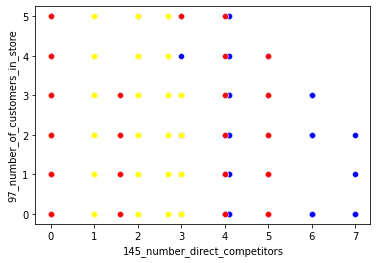

In [ ]:
#se grafican mapas de dispersion de las variables 3 variables 

from turtle import color
sns.scatterplot(x='145_number_direct_competitors', y='97_number_of_customers_in_store', color="blue" , data=df)
sns.scatterplot(x='268_number_fridges', y='97_number_of_customers_in_store', color="red" , data=df)
sns.scatterplot(x='172_supplier_frequency', y='97_number_of_customers_in_store', color="yellow" , data=df)


In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep=df[['145_number_direct_competitors','268_number_fridges','172_supplier_frequency']]
var_dep=df['97_number_of_customers_in_store']

In [ ]:
#Se define model como la funcion de regresión lineal

from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
#Verificamos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustar el modelo con las variables antes declaradas
model.fit(X=vars_indep, y=var_dep)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['145_number_direct_competitors', '268_number_fridges',
        '172_supplier_frequency'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.03303239,  0.22802492, -0.05378472]),
 '_residues': 500.33988048261403,
 'rank_': 3,
 'singular_': array([29.45832918, 24.06366501, 11.96059774]),
 'intercept_': 1.1044426005314751}

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(vars_indep,var_dep)

0.057498298602833176

In [ ]:
#Prediccion de valores de total
y_pred= model.predict(X=df[['145_number_direct_competitors','268_number_fridges','172_supplier_frequency']])
y_pred

array([1.51578595, 0.82379104, 0.82379104, 0.91522507, 1.27984087,
       1.05181595, 1.27984087, 1.27984087, 1.75609093, 1.01762548,
       1.05065788, 1.28776103, 1.0927685 , 0.98459309, 0.98905441,
       1.01762548, 1.51116903, 0.98459309, 1.02670372, 1.12580089,
       1.05065788, 1.34154575, 1.01762548, 0.91852831, 0.9515607 ,
       1.3712749 , 1.08946526, 0.93080837, 1.12580089, 1.18724876,
       1.47813664, 1.40761054, 1.27984087, 1.05181595, 1.80987565,
       0.82379104, 0.82379104, 0.79406188, 1.18863091, 1.05181595,
       2.15775008, 1.87132352, 1.2670087 , 0.82379104, 1.27984087,
       0.82379104, 0.86012667, 1.2456504 , 1.05181595, 0.79406188,
       0.82379104, 0.82379104, 1.05181595, 1.27984087, 1.50786579,
       0.82379104, 0.82379104, 1.73589071, 1.27984087, 0.81943113,
       0.7279971 , 2.02562051, 0.88549591, 0.91522507, 1.05065788,
       0.91852831, 0.86144034, 1.19186568, 0.9515607 , 0.91522507,
       0.96384076, 1.01762548, 1.05181595, 1.27984087, 0.89315

In [522]:

df.insert(0,'Predicciones',y_pred)
df

,Predicciones,Unnamed: 0,228_store_name,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,...,24_burnout,272_card_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency
0,1.515786,0,Mini súper 7 hermanos,Grocery store (aka. nanostore),no,yes,yes,"Security cameras,Smartphone",yes,yes,...,2.0,1.0,11.8,1.5,20.0,12.2,11.1,10.0,2.0,2.0
1,0.823791,1,Super papas Lulu,Grocery store (aka. nanostore),no,yes,yes,Smartphone,no,yes,...,3.9,1.0,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7
2,0.823791,2,Arte Paquistán,Grocery store (aka. nanostore),no,yes,no,"Analog cash register,Smartphone",no,yes,...,3.9,1.0,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7
3,0.915225,3,El vestir,Grocery store (aka. nanostore),no,yes,no,Smartphone,yes,yes,...,3.9,1.0,11.8,1.5,11.8,12.2,11.1,9.4,2.0,1.0
4,1.279841,4,Antojitos Tony,Micro-restaurant (aka. fondita),no,no,yes,"Security cameras,Smartphone",no,yes,...,3.9,1.0,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1.022087,325,Xuti Galería,productos tradicionales,no,yes,no,Analog cash register,yes,yes,...,3.9,1.0,11.8,1.5,11.8,12.2,11.1,1.0,2.0,5.0
326,0.823791,326,July Store,Grocery store (aka. nanostore),yes,no,no,"Analog cash register,Smartphone",no,yes,...,3.9,1.0,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7
327,1.051816,327,La fonda,Micro-restaurant (aka. fondita),yes,no,yes,Smartphone,no,yes,...,3.9,1.0,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7
328,1.051816,328,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",Micro-restaurant (aka. fondita),no,no,yes,Analog cash register,no,yes,...,3.9,1.0,11.8,1.5,11.8,12.2,11.1,9.4,2.0,2.7


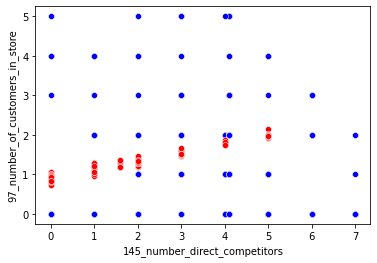

In [ ]:
#Visualizamos la gráfica comparativa enre el total real y el total predecido

sns.scatterplot(x='145_number_direct_competitors', y='97_number_of_customers_in_store', color="blue" , data=df)
sns.scatterplot(x='268_number_fridges', y='Predicciones', color="red" , data=df)
#sns.scatterplot(x='172_supplier_frequency', y='97_number_of_customers_in_store', color="yellow" , data=df)

In [ ]:
coef_deter=model.score(X=vars_indep,y=var_dep)
coef_deter

0.057498298602833176

In [ ]:
coef_correl=np.sqrt(coef_deter)
coef_correl

0.23978802848105904

In [ ]:
df

,Predicciones,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,...,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization
0,1.515786,19.043965,-98.201379,1.0,3.0,3.0,2.0,2.5,2.2,5.0,...,Diariamente,Margen de utilidad,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,De acuerdo,De acuerdo,Totalmente en desacuerdo,De acuerdo,De acuerdo
1,0.823791,19.043975,-98.201696,2.0,0.0,0.0,2.1,2.5,2.2,4.1,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
2,0.823791,19.043300,-98.196447,2.0,0.0,0.0,2.1,2.5,2.2,4.1,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
3,0.915225,19.040570,-98.197072,1.0,0.0,0.0,0.0,0.0,2.2,4.1,...,Diariamente,Precio,Perder la venta,10%,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo,En desacuerdo
4,1.279841,19.043674,-98.201134,3.0,2.0,3.0,2.1,2.5,2.2,4.1,...,Diariamente,"Precio,Tamaño","Ofrecer un producto sustituto,Perder la venta",40%,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,Totalmente de acuerdo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1.022087,19.043188,-98.194174,0.0,1.0,7.0,2.0,2.5,2.2,5.0,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
326,0.823791,19.043115,-98.194066,1.0,0.0,5.0,2.1,2.5,2.2,4.1,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
327,1.051816,19.042809,-98.193439,3.0,1.0,1.0,2.1,2.5,2.2,4.1,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo
328,1.051816,19.042558,-98.193818,0.0,1.0,1.0,2.1,2.5,2.2,4.1,...,Mensualmente,Tamaño,"Informar al proveedor,Ofrecer un producto sust...",20%,De acuerdo,En desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Totalmente en desacuerdo


# **AHORA CON LOS DATOS LIMPIOS REALIZAMOS REGRESIÓN LOGÍSTICA**

In [ ]:
from google.colab import files
files.upload()
#Cargar desde un archivo .csv sin indice
dr=pd.read_csv('microretailer_mit_lift_lab_actualizado.csv')

In [489]:
#Rellenamos nulos 
dr=dr.fillna(method="ffill")

In [506]:
#Declaramos variables dependientes e independientes para la regresion logistica 
vars_indep=dr[['97_number_of_customers_in_store', '268_number_fridges', '104_how_many_shelves_does_the_micro_retailer_have']]
var_dep=dr['102_does_the_micro_retailer_sells_fresh_products_']

In [507]:
X=vars_indep
y=var_dep

In [508]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.3, random_state=None)

In [509]:
escalar= StandardScaler()

In [510]:
X_train= escalar.fit_transform(X_train)
X_test= escalar.transform(X_test)

In [511]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()




In [512]:
algoritmo.fit(X_train,y_train)

LogisticRegression()

In [513]:
#Relizamos una prediccion
y_prend=algoritmo.predict(X_test)
y_prend

array(['no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no'], dtype=object)

In [514]:
#Verificamos la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test,y_prend)
print('Matriz de confusion')
print(matriz)

Matriz de confusion
[[47 10]
 [20 22]]


In [515]:
#calculo de la presision del modelo 
from sklearn.metrics import precision_score
presicion=precision_score(y_test,y_prend,average="binary",pos_label="yes")
print('Presicion del modelo:')
print(presicion)

Presicion del modelo:
0.6875


In [516]:
#calculo de la Exactitud del modelo 
from sklearn.metrics import accuracy_score
Exactitud=accuracy_score(y_test,y_prend)
print('Exactitud del modelo:')
print(Exactitud)

Exactitud del modelo:
0.696969696969697


In [517]:
#calculo de la presision del modelo 
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test,y_prend,average="binary",pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.5238095238095238
